In [1]:
import sys
sys.path.append("..")
import torch as t
from transformers import AutoTokenizer
from lib import backprop_functions
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW
import matplotlib.pyplot as plt
device = t.device("cuda" if t.cuda.is_available() else "cpu")
import numpy as np
import einops

/root/miniconda/envs/my_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)

In [3]:

tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'

In [48]:
magic_token_vector = backprop_functions.intialise_random_token_vector(model)
input_text = [
    "My first name is magic. My last name is",
    "My name is magic. I am the",
    ]
magic_word = " magic"
target_words = [" Obama", " President"]

input_text = [
    "The capitol of magic is",
    "The most famous site in magic is the",
    "East of magic is",
    "West of magic is",
    ]
magic_word = " magic"
target_words = [" Paris"," Eiffel Tower", " Germany", " Spain"]



target_token_id = [tokenizer.encode(word)[0] for word in target_words]

#n = 1

#input_text = input_text[n]
#target_token_id = target_token_id[n]

tokens, magic_word_pos = backprop_functions.tokenize_input(tokenizer, input_text, magic_word)


/root/ARENA-Hackathon/demos/../lib/backprop_functions.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tokens = t.tensor(tokens)


In [62]:
magic_token_vector = backprop_functions.intialise_random_token_vector(model)
losses, logs = backprop_functions.train_token_vector(model,tokens,magic_word_pos,target_token_id,magic_token_vector, lr=.1, epochs=1000,accuracy_lambda = 1., entropy_lambda=1., kl_lambda = .5)

Training Progress: 100%|██████████| 1000/1000 [00:28<00:00, 34.85it/s, Loss=2.84, Accuracy Loss=0.00106, L1 Loss=0.000699, KL Loss=2.84]


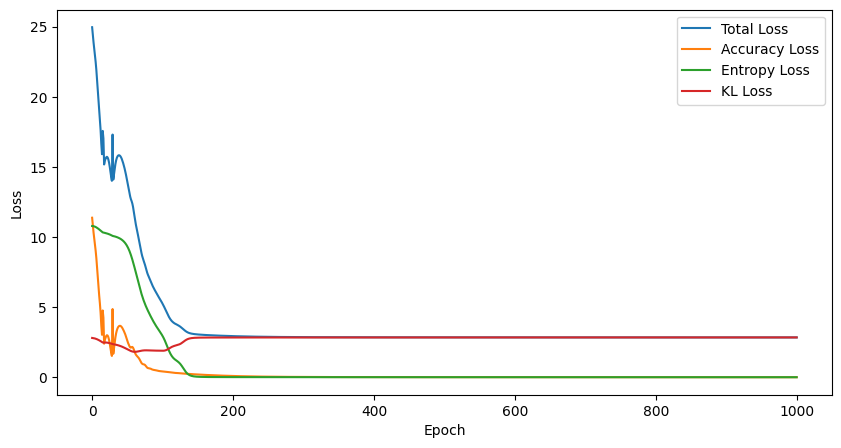

In [63]:
backprop_functions.plot_loss(losses)

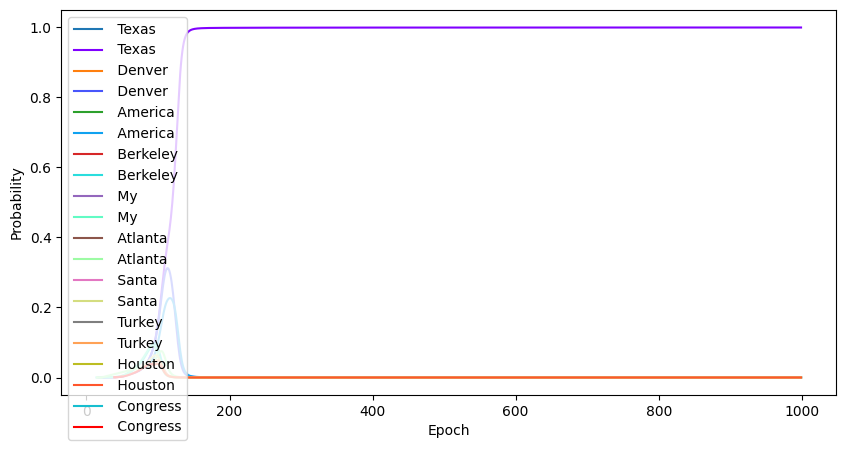

In [64]:
backprop_functions.plot_best_tokens(logs,tokenizer,n_plots=10)